In [1]:
#import Libary 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
def show_img(i):
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(y_train[i])
    plt.show()

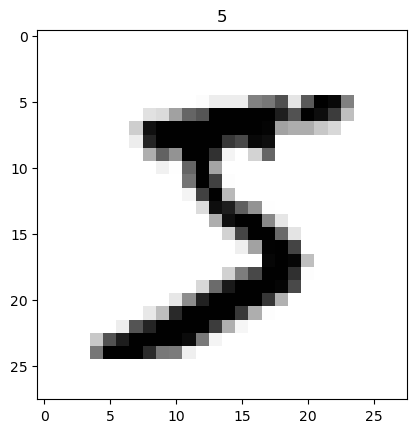

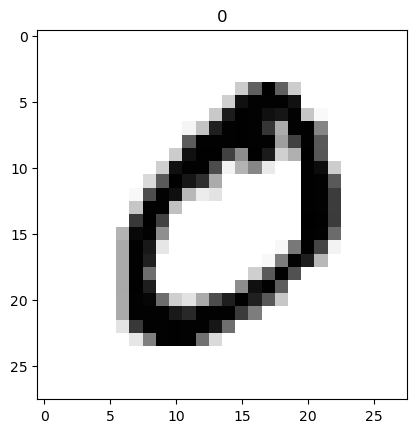

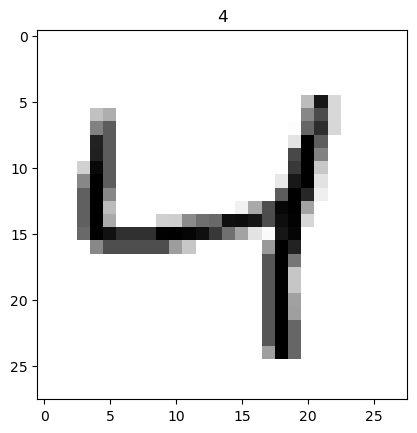

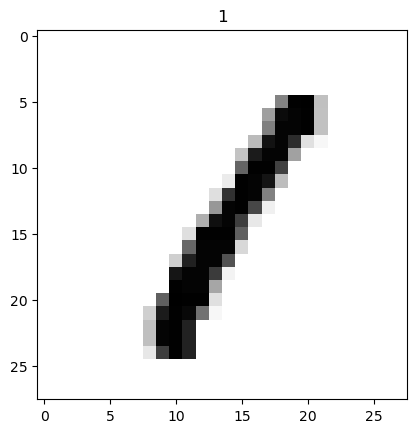

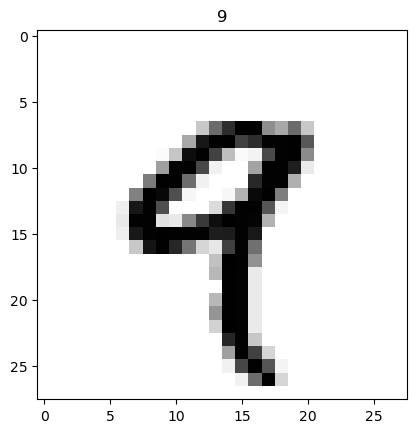

In [4]:
for i in range (5):
    show_img(i)

In [5]:
print (x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

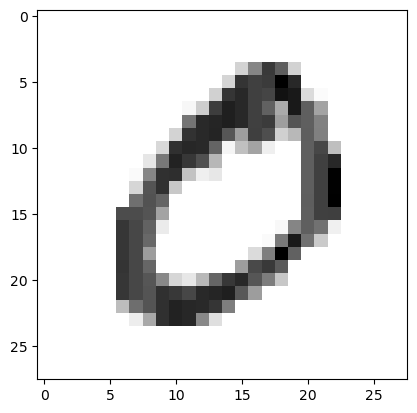

In [6]:
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)
plt.imshow(x_train[1], cmap=plt.cm.binary)

In [7]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
img_size = 28
x_trainr = np.array(x_train).reshape(-1, img_size, img_size,1)
x_testr = np.array(x_test).reshape(-1, img_size, img_size,1)
print("Train Sample Dimension",x_trainr.shape)
print("Train Sample Dimension",x_testr.shape)

Train Sample Dimension (60000, 28, 28, 1)
Train Sample Dimension (10000, 28, 28, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

modelcnn = Sequential()

modelcnn.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
modelcnn.add(Activation("relu"))
modelcnn.add(MaxPooling2D(pool_size=(2,2)))

modelcnn.add(Conv2D(64,(3,3)))
modelcnn.add(Activation("relu"))
modelcnn.add(MaxPooling2D(pool_size=(2,2)))

modelcnn.add(Conv2D(64,(3,3)))
modelcnn.add(Activation("relu"))
modelcnn.add(MaxPooling2D(pool_size=(2,2)))

modelcnn.add(Flatten())
modelcnn.add(Dense(64))
modelcnn.add(Activation("relu"))

modelcnn.add(Dense(32))
modelcnn.add(Activation("relu"))

modelcnn.add(Dense(10))
modelcnn.add(Activation("softmax"))

In [10]:
modelcnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [11]:
print("Total Train Samples = ", len(x_trainr))

Total Train Samples =  60000


In [12]:
modelcnn.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
modelcnn.fit(x_trainr, y_train, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.3504 - accuracy: 0.8881 - val_loss: 0.1524 - val_accuracy: 0.9524
Epoch 2/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1040 - accuracy: 0.9685 - val_loss: 0.0782 - val_accuracy: 0.9768
Epoch 3/10
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0741 - accuracy: 0.9778 - val_loss: 0.1033 - val_accuracy: 0.9686
Epoch 4/10
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0588 - accuracy: 0.9819 - val_loss: 0.0739 - val_accuracy: 0.9778
Epoch 5/10
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0575 - val_accuracy: 0.9834
Epoch 6/10
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0373 - accuracy: 0.9884 - val_loss: 0.0602 - val_accuracy: 0.9822
Epoch 7/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0751 -

In [13]:
test_loss, test_acc = modelcnn.evaluate(x_testr, y_test)
print("Test Loss : " ,test_loss)
print ("Validation Accuracy : ", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0759 - accuracy: 0.9804
Test Loss :  0.07585103064775467
Validation Accuracy :  0.980400025844574


In [14]:
prediction = modelcnn.predict([x_testr])

313/313 [==============================] - 2s 6ms/step


In [15]:
def show_img_predict(i):
    print("The number is ",np.argmax(prediction[i]))
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.show()

The number is  7


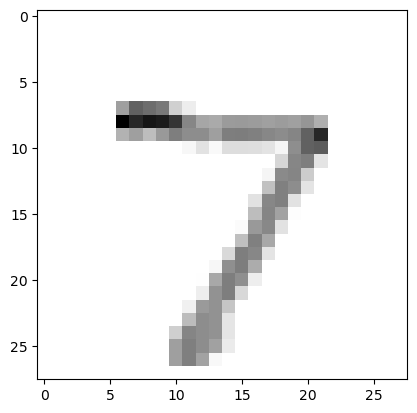

The number is  2


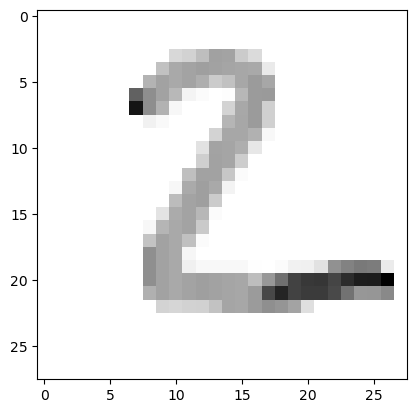

The number is  1


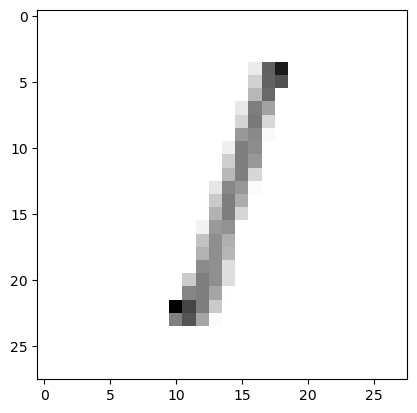

The number is  0


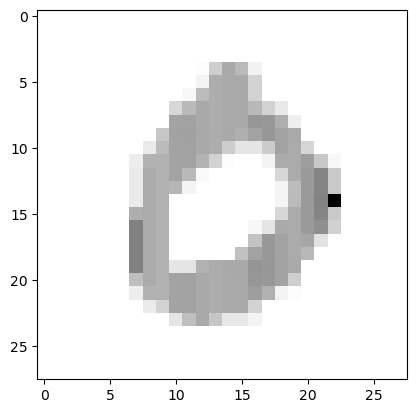

The number is  4


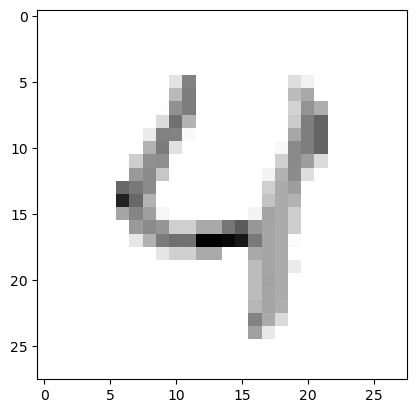

In [16]:
for i in range (5):
    show_img_predict(i)

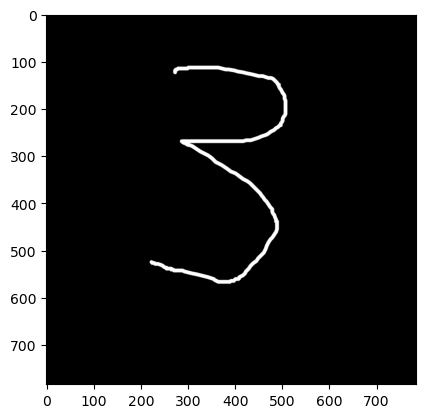

In [17]:
import cv2
img = cv2.imread("test.png")
plt.imshow(img)

In [18]:
img.shape

(784, 784, 3)

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [20]:
gray.shape

(784, 784)

In [21]:
resize = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [22]:
resize.shape

(28, 28)

In [23]:
newimg = tf.keras.utils.normalize(resize, axis= 1)
newimg = np.array(newimg).reshape(-1, img_size, img_size, 1)
newimg.shape

(1, 28, 28, 1)

In [24]:
prediction = modelcnn.predict(newimg)

1/1 [==============================] - 0s 66ms/step


The number is  3


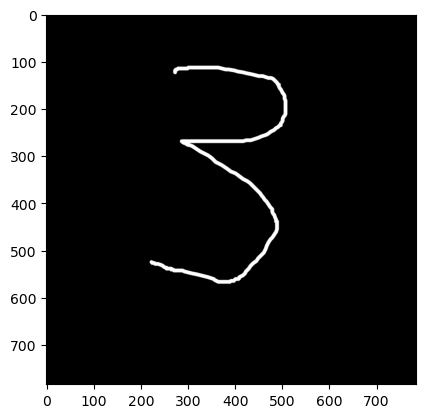

In [25]:
print("The number is ",np.argmax(prediction))
plt.imshow(img)

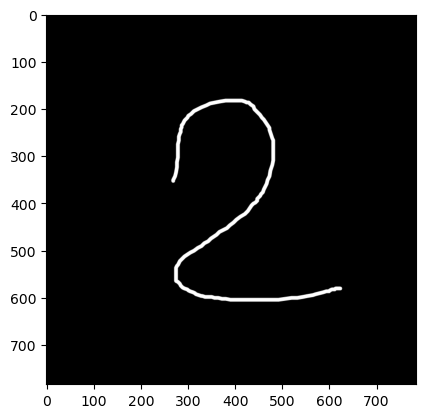

In [26]:
import cv2
img1 = cv2.imread("test1.png")
plt.imshow(img1)

In [27]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resize1 = cv2.resize(gray1, (28,28), interpolation = cv2.INTER_AREA)
newimg1 = tf.keras.utils.normalize(resize1, axis= 1)
newimg1 = np.array(newimg1).reshape(-1, img_size, img_size, 1)
newimg1.shape

(1, 28, 28, 1)

In [28]:
prediction1 = modelcnn.predict(newimg1)

1/1 [==============================] - 0s 21ms/step


The number is  2


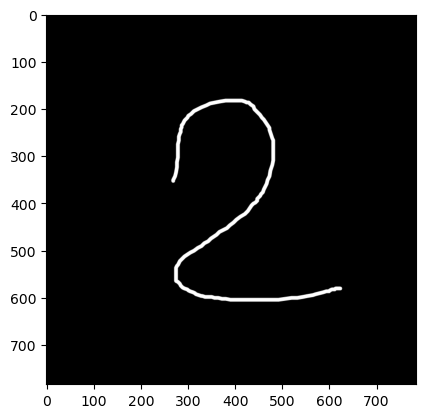

In [29]:
print("The number is ",np.argmax(prediction1))
plt.imshow(img1)